In [12]:
using Revise, DeconvOptim, TestImages, Noise, CUDA, ImageShow, Colors, FFTW
FFTW.set_num_threads(8)
CUDA.allowscalar(false);

h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

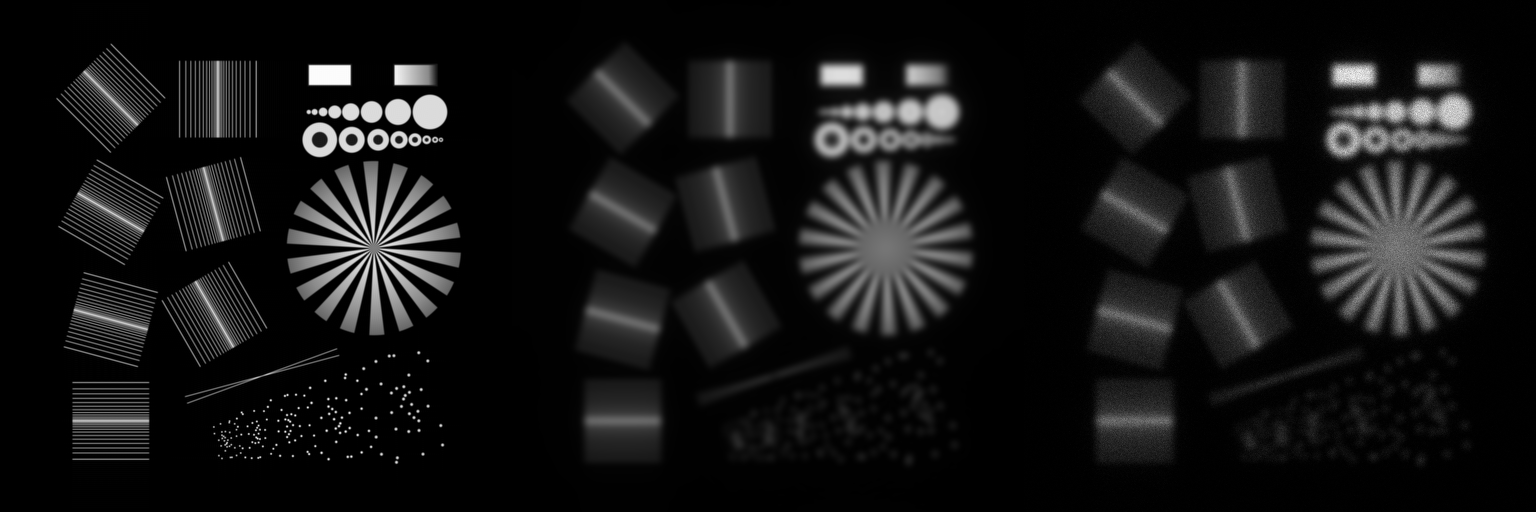

In [13]:
# load test images
img = convert(Array{Float32}, Float32.(testimage("resolution_test_512")))

psf = Float32.(generate_psf(size(img), 30))
psf_c = CuArray(psf)
# create a blurred, noisy version of that image
img_b = conv_psf(img, psf)
img_n = poisson(img_b, 300);

img_n_c = CuArray(img_n)
h_view(img, img_b, img_n)

In [14]:
@time resG, optim_res = deconvolution(img_n, psf, loss=Poisson(), regularizer=TV(, iterations=500)

  3.767219 seconds (394.70 k allocations: 8.685 GiB, 7.21% gc time)


(Float32[3.528088f-8 5.928176f-8 … 6.6062853f-9 5.1873116f-8; 1.80591f-8 1.6826824f-8 … 3.4524426f-8 4.0310407f-8; … ; 5.324026f-8 1.5466135f-7 … 5.846468f-8 1.161169f-9; 7.3678535f-10 1.6051708f-8 … 1.7628722f-8 9.667436f-10],  * Status: success

 * Candidate solution
    Final objective value:     5.426566e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.56e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.29e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 5.47e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   4  (vs limit Inf)
    Iterations:    159
    f(x) calls:    470
    ∇f(x) calls:   470
)

In [9]:
@time resG_c, optim_res_c = deconvolution(img_n_c, psf_c, loss=Poisson(), regularizer=nothing, iterations=10)

  0.072283 seconds (77.66 k allocations: 43.773 MiB)


(Float32[3.0082949f-5 2.019553f-5 … 3.843477f-5 3.6108428f-5; 2.1043455f-5 9.765344f-6 … 3.5217305f-5 3.0198327f-5; … ; 3.785833f-5 3.379448f-5 … 3.8437876f-5 3.8931037f-5; 3.557525f-5 2.8773118f-5 … 3.882574f-5 3.8505426f-5],  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.406980e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.74e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.00e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.27e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.20e-05 ≰ 0.0e+00
    |g(x)|                 = 3.11e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10
    f(x) calls:    41
    ∇f(x) calls:   41
)

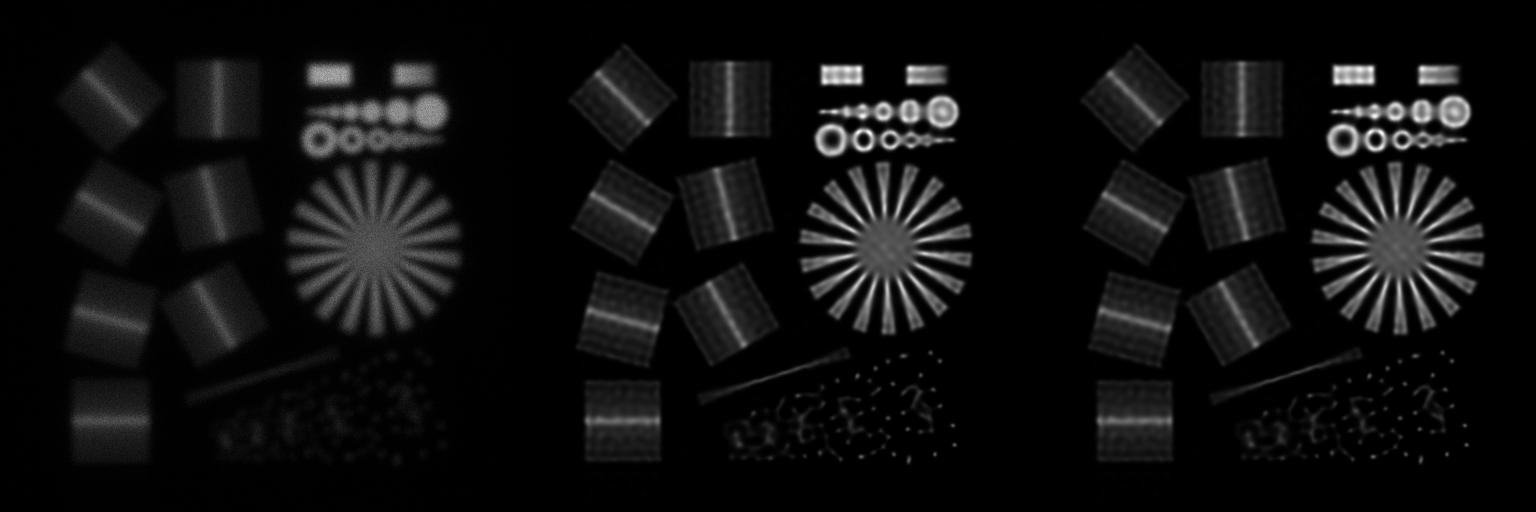

In [10]:
h_view(Array(img_n_c), Array(resG_c), Array(resG))